# Flight Status Predictor - EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

pd.options.display.max_columns = 50


In [3]:
# Import data

# import required modules
import zipfile

# read the dataset using the compression zip
df = pd.read_csv('/content/drive/MyDrive/Projects/Flight_Status_Group_Project/df_export.zip',compression='zip')



In [4]:
# df = pd.read_csv('Flight_On_Time_Data.csv')

## Organize DataFrame

In [5]:
df.head()

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Actual_Dep_Time,Dep_Time_Offset,Dep_Delay_Minutes,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Arr_Time_Block_Group,Actual_Arr_Time,Arr_Time_Offset,Arr_Delay_Minutes,Arr_Delay_At_Least_15_Minutes,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay
0,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N851UA,1788,11298,30194,DFW,"Dallas/Fort Worth, TX",11618,31703,EWR,"Newark, NJ",Evening,1926,1933,7,7,0,2359,Night,12,13,13,0,0,0,213,219,162,1,1372,6,NaN,NaN,NaN,NaN,NaN
1,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37530,1787,11292,30325,DEN,"Denver, CO",13871,33316,OMA,"Omaha, NE",Evening,2051,2130,39,39,1,2316,Night,3,47,47,1,0,0,85,93,65,1,472,2,39.0,0.0,8.0,0.0,0.0
2,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N78509,1786,12892,32575,LAX,"Los Angeles, CA",11042,30647,CLE,"Cleveland, OH",Night,2328,2319,-9,0,0,701,Early Morning,650,-11,0,0,0,0,273,271,249,1,2052,9,NaN,NaN,NaN,NaN,NaN
3,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N47280,1785,10721,30721,BOS,"Boston, MA",12264,30852,IAD,"Washington, DC",Early Morning,600,557,-3,0,0,735,Early Morning,724,-11,0,0,0,0,95,87,69,1,413,2,NaN,NaN,NaN,NaN,NaN
4,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N826UA,1784,14747,30559,SEA,"Seattle, WA",11292,30325,DEN,"Denver, CO",Morning,1116,1113,-3,0,0,1459,Early Afternoon,1453,-6,0,0,0,0,163,160,129,1,1024,5,NaN,NaN,NaN,NaN,NaN


In [6]:
# Dropping redundant or extraneous columns and
# renaming target variable to Delayed15

df = df[['Carrier_Name',
        #'Year', 'Quarter',
        'Month',
        #'Month_Day',
        'Week_Day',
        #'Flight_Date', 'Airline_DOT_ID',
        'Tail_Number',
        #'Flight_Number',
        #'Origin_Airport_ID', 'Origin_City_Market_ID',
        'Origin_IATA_Code',
        #'Origin_City_State', 'Destination_Airport_ID',
        #'Destination_City_Market_ID',
        'Destination_IATA_Code',
        #'Destination_City_State',
        'Dep_Time_Block_Group',
        'Scheduled_Departure_Time',
        #'Actual_Dep_Time', 'Dep_Time_Offset',
        #'Dep_Delay_Minutes', 'Dep_Delay_At_Least_15_Minutes',
        'Scheduled_Arrival_Time',
        'Arr_Time_Block_Group', #'Actual_Arr_Time',
        #'Arr_Time_Offset', 'Arr_Delay_Minutes',
        'Arr_Delay_At_Least_15_Minutes',
        #'Flight_Cancelled', 'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time',
        #'Actual_Gate_to_Gate_Time', 'Time_Airborne', 'Number_of_Flights',
        'Distance_Miles',
        'Distance_Group',
        #'Carrier_Delay', 'Weather_Delay',
        #'National_Aviation_System_Delay', 'Security_Delay',
        #'Late_Aircraft_Delay'
]].copy()

df.rename(columns={'Arr_Delay_At_Least_15_Minutes':'Delayed','Origin_IATA_Code':'Origin','Destination_IATA_Code':'Destination'}, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 13 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Carrier_Name              object
 1   Month                     object
 2   Week_Day                  object
 3   Tail_Number               object
 4   Origin                    object
 5   Destination               object
 6   Dep_Time_Block_Group      object
 7   Scheduled_Departure_Time  int64 
 8   Scheduled_Arrival_Time    int64 
 9   Arr_Time_Block_Group      object
 10  Delayed                   int64 
 11  Distance_Miles            int64 
 12  Distance_Group            int64 
dtypes: int64(5), object(8)
memory usage: 672.3+ MB


In [7]:
# Grouping numerical columns and
# Moving the target variable to be the right-most column

# Columns to move
cols_to_move = [
                'Distance_Miles',
                'Scheduled_Departure_Time',
                'Scheduled_Arrival_Time'
                ]

last_col = 'Delayed'

# Extracting the columns to move
columns_to_move = df[cols_to_move]

# Dropping these columns from the DataFrame
df.drop(columns=cols_to_move, inplace=True)

# Extracting the last column
last_column = df.pop(last_col)

# Reinserting the numerical columns
df = pd.concat([df, columns_to_move], axis=1)

# Reinserting the last column
df[last_col] = last_column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 13 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Carrier_Name              object
 1   Month                     object
 2   Week_Day                  object
 3   Tail_Number               object
 4   Origin                    object
 5   Destination               object
 6   Dep_Time_Block_Group      object
 7   Arr_Time_Block_Group      object
 8   Distance_Group            int64 
 9   Distance_Miles            int64 
 10  Scheduled_Departure_Time  int64 
 11  Scheduled_Arrival_Time    int64 
 12  Delayed                   int64 
dtypes: int64(5), object(8)
memory usage: 672.3+ MB


## Summary Statistics

### Numerical Data

In [8]:
# Disable scientific notation
pd.set_option('display.float_format', '{:.1f}'.format)

# Describe Numerical Value
df[['Distance_Miles']].describe()

,Distance_Miles
count,6777978.0
mean,835.0
std,597.9
min,21.0
25%,399.0
50%,680.0
75%,1069.0
max,5095.0


### Catergorical Data

In [9]:
# Ensure Distance_Group is treated as a categorical variable
df['Distance_Group'] = df['Distance_Group'].astype('category')



# Describe Categorical Values
df[['Carrier_Name',
   'Month',
   'Week_Day',
   'Tail_Number',
   'Origin','Destination',
   'Dep_Time_Block_Group',
   'Arr_Time_Block_Group',
   'Distance_Group'
]].describe()

,Carrier_Name,Month,Week_Day,Tail_Number,Origin,Destination,Dep_Time_Block_Group,Arr_Time_Block_Group,Distance_Group
count,6777978,6777978,6777978,6777978,6777978,6777978,6777978,6777978,6777978
unique,15,12,7,5969,348,348,6,6,11
top,Southwest Airlines Co.,Oct,Friday,N488HA,ATL,ATL,Morning,Morning,2
freq,1436531,596003,1006397,3387,333791,333809,1675136,1541215,1537278


### Categorical Descriptive Statistics for all Variables

In [10]:
df.astype('object').describe()

,Carrier_Name,Month,Week_Day,Tail_Number,Origin,Destination,Dep_Time_Block_Group,Arr_Time_Block_Group,Distance_Group,Distance_Miles,Scheduled_Departure_Time,Scheduled_Arrival_Time,Delayed
count,6777978,6777978,6777978,6777978,6777978,6777978,6777978,6777978,6777978,6777978,6777978,6777978,6777978
unique,15,12,7,5969,348,348,6,6,11,1584,1365,1435,2
top,Southwest Airlines Co.,Oct,Friday,N488HA,ATL,ATL,Morning,Morning,2,337,600,2359,0
freq,1436531,596003,1006397,3387,333791,333809,1675136,1541215,1537278,39072,143225,33221,5406527


## Delayed Flights Analysis

### Total Number of Delayed Flights from <u>01 Apr 2023</u> to <u>31 Mar 2024</u>

In [11]:
# Extract total number of flights
num_flights = df['Delayed'].count()

# Extract total number of on time and delayed flights
on_time, delayed = df['Delayed'].value_counts()

# Display total number of flights, delayed flights, and percentage delayed flights
print(f'Total Number of Flights = {num_flights:,}')
print(f'Number of Delayed Flights = {delayed:,}')
print(f'Percentage of Delayed Flights = {(delayed/num_flights)*100:.3} %')

Total Number of Flights = 6,777,978
Number of Delayed Flights = 1,371,451
Percentage of Delayed Flights = 20.2 %


### Precentage of Total Flights that were Delayed

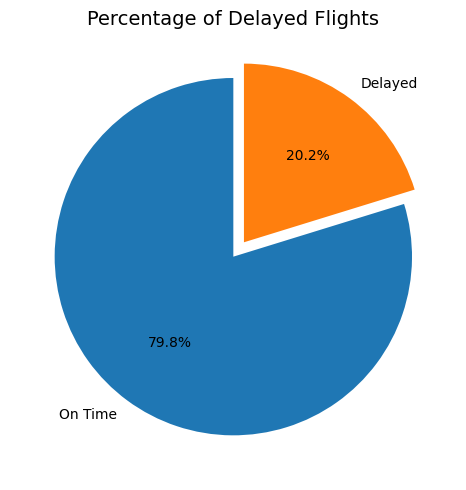

In [12]:
# Visualizing Delayed Flight Percentage

# Data and Labels
data = [on_time, delayed]
keys = ['On Time', 'Delayed']

# Pie Chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    data,
    labels=keys,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0.1]
)


# Adjusting Figure Size
fig.set_size_inches(5, 5)

# Title and Layout Adjustments
plt.title('Percentage of Delayed Flights', fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()


### Percentage of Delayed Flights by Feature

#####  *** Below I chose to keep the Month and Weekday variables as I wanted to see what percentage of delayed flights happen in each month and day. I wasn't sure how to do that had I kept the Flight_Date variable. ***

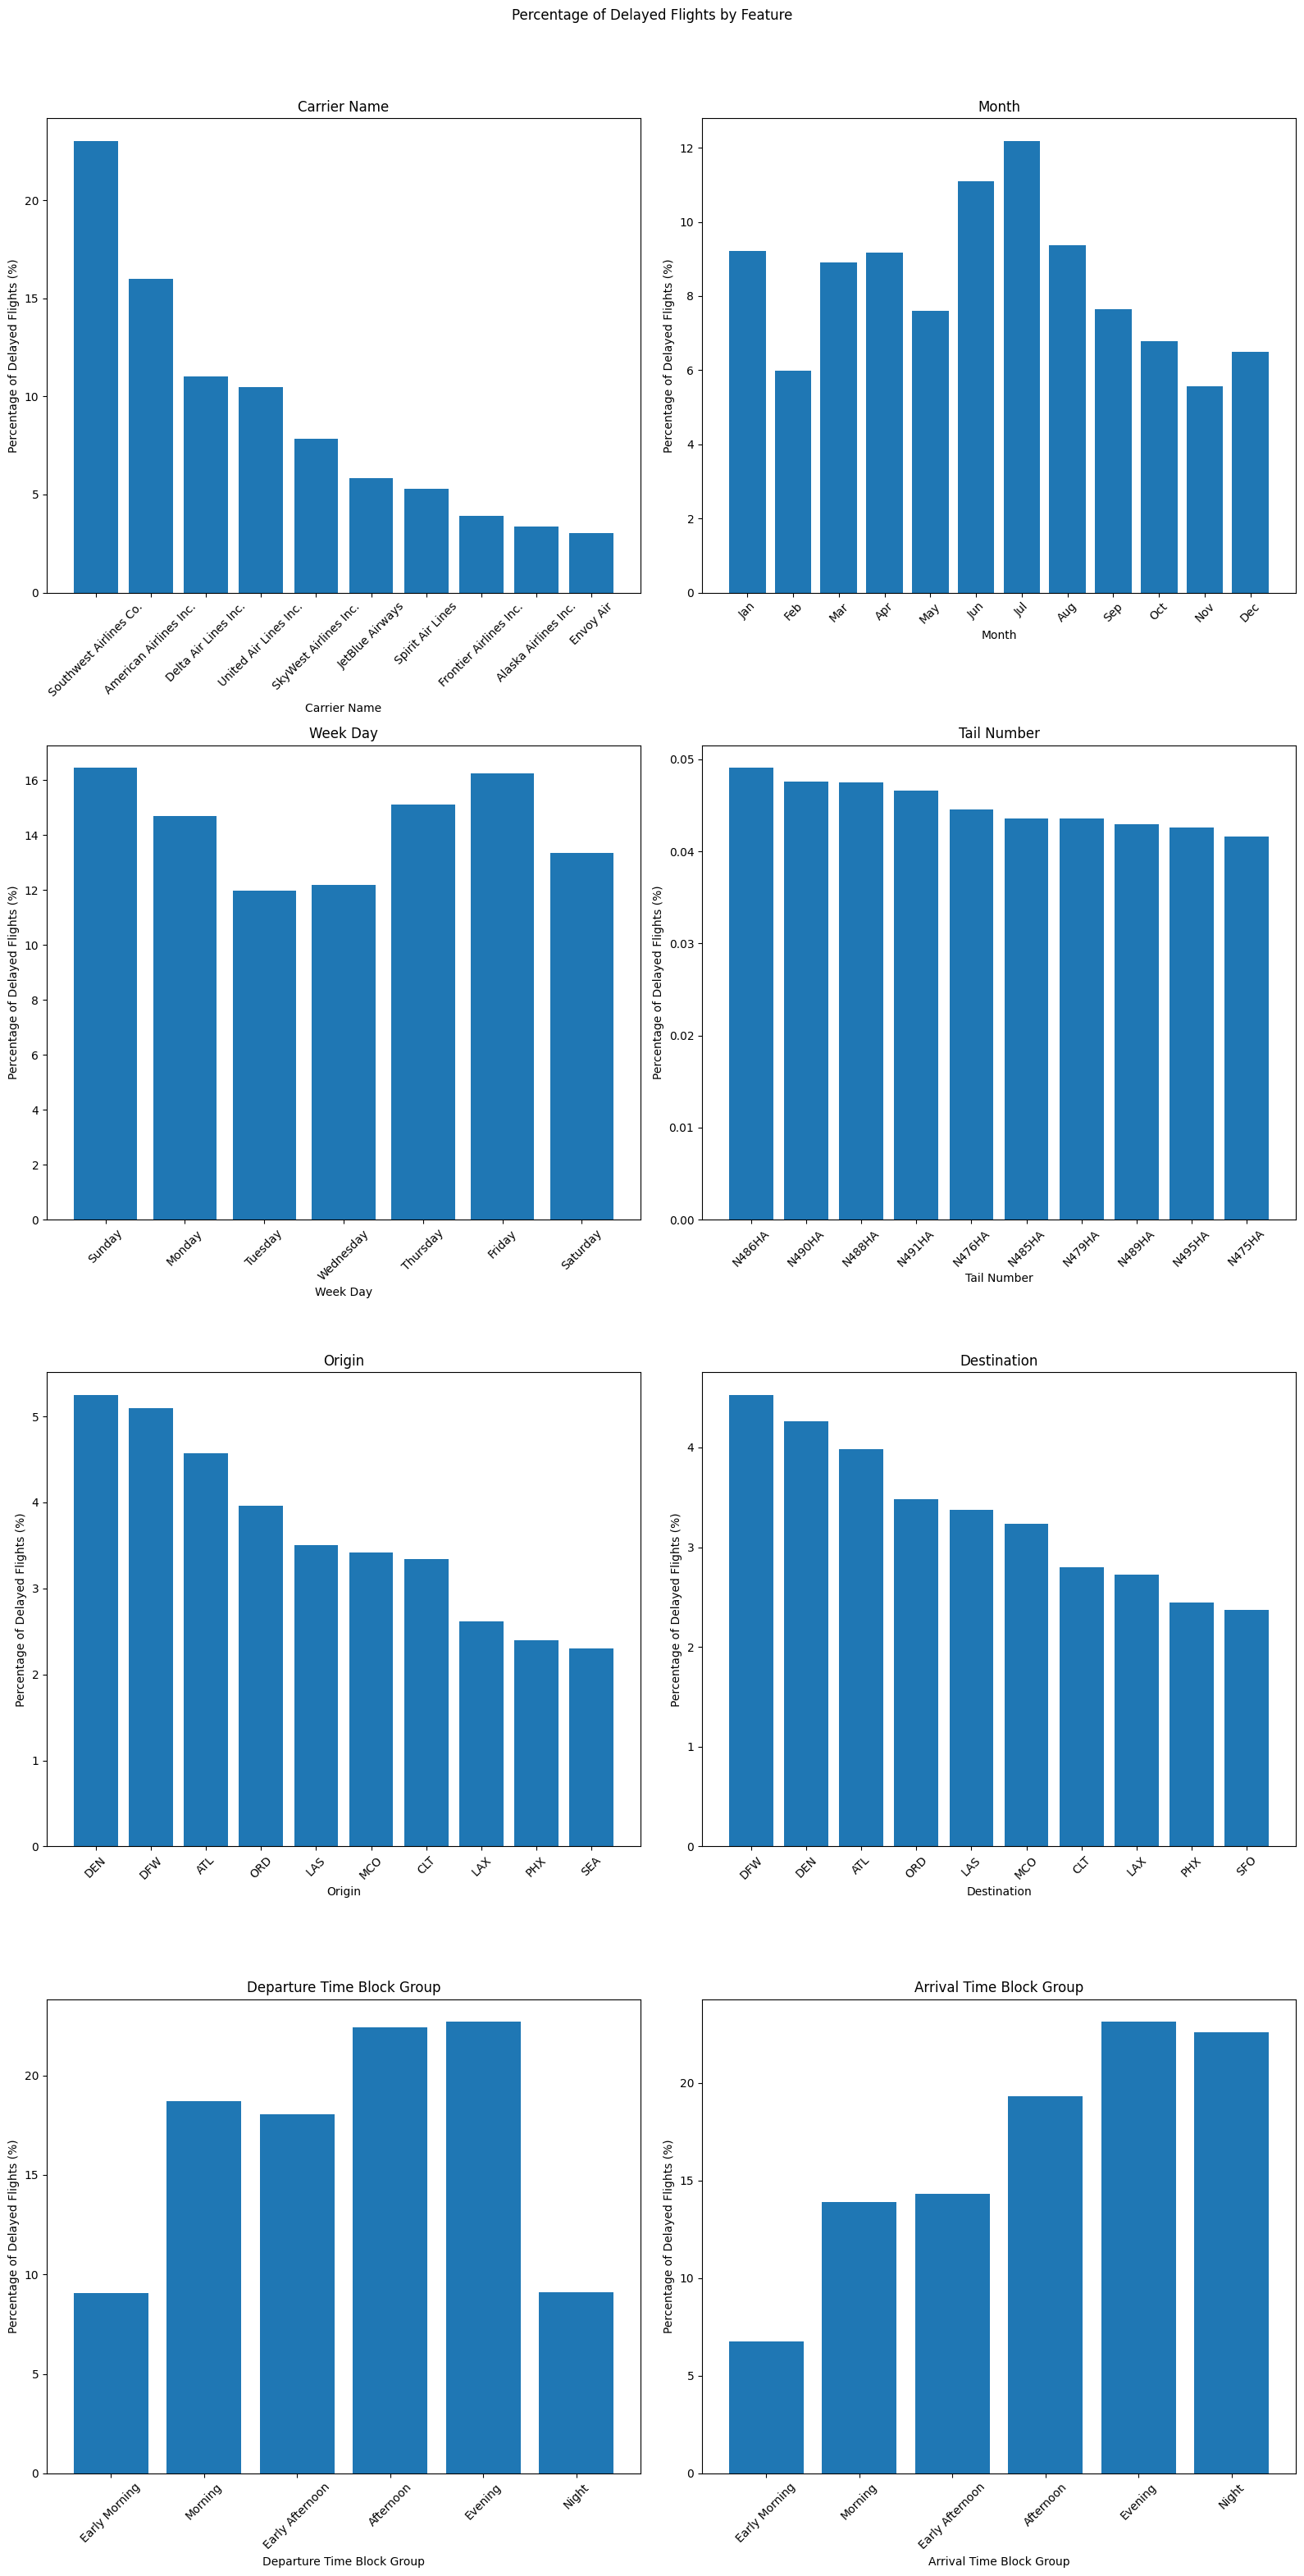

In [13]:
# Define categorical variables
categorical_features = [
    ('Carrier_Name', 'Carrier Name'),
    ('Month', 'Month'),
    ('Week_Day', 'Week Day'),
    ('Tail_Number', 'Tail Number'),
    ('Origin', 'Origin'),
    ('Destination', 'Destination'),
    ('Dep_Time_Block_Group', 'Departure Time Block Group'),
    ('Arr_Time_Block_Group', 'Arrival Time Block Group')
]

# Initialize subplot figure with two columns of four
fig, axs = plt.subplots(4, 2, figsize=(16, 32))
axs = axs.flatten()

# Create bar charts for each categorical variable
for i, (var, title) in enumerate(categorical_features):
    if var in ['Tail_Number', 'Origin', 'Destination', 'Carrier_Name']:
        # Limit top 10 for Tail_Number, Origin, and Destination
        top_10 = df[df['Delayed'] == 1][var].value_counts().head(10).sort_values(ascending=False)
        labels = top_10.index
        values = (top_10.values / delayed) * 100
    elif var == 'Month':
        # Sort month in order from January to December
        month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        month_counts = df[df['Delayed'] == 1]['Month'].value_counts(normalize=True).loc[month_order]
        labels = month_counts.index
        values = month_counts.values * 100
    elif var == 'Week_Day':
        # Sort week day from Sunday to Saturday
        weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
        weekday_counts = df[df['Delayed'] == 1]['Week_Day'].value_counts(normalize=True).loc[weekday_order]
        labels = weekday_counts.index
        values = weekday_counts.values * 100
    elif var == 'Dep_Time_Block_Group':
        # Sort time block group from Early Morning to Night
        dep_block_order = ['Early Morning', 'Morning', 'Early Afternoon', 'Afternoon', 'Evening', 'Night']
        dep_block_counts = df[df['Delayed'] == 1]['Dep_Time_Block_Group'].value_counts(normalize=True).loc[dep_block_order]
        labels = dep_block_counts.index
        values = dep_block_counts.values * 100
    else:
        # Sort time block group from Early Morning to Night
        arr_block_order = ['Early Morning', 'Morning', 'Early Afternoon', 'Afternoon', 'Evening', 'Night']
        arr_block_counts = df[df['Delayed'] == 1]['Arr_Time_Block_Group'].value_counts(normalize=True).loc[arr_block_order]
        labels = arr_block_counts.index
        values = arr_block_counts.values * 100

    # Create bar chart
    axs[i].bar(labels, values)
    axs[i].set_title(title)
    axs[i].set_xlabel(title)
    axs[i].set_ylabel('Percentage of Delayed Flights (%)')
    axs[i].tick_params(axis='x', rotation=45)

# Update layout
plt.suptitle('Percentage of Delayed Flights by Feature')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plot
plt.show()

### Counts of Delayed Flights by Feature

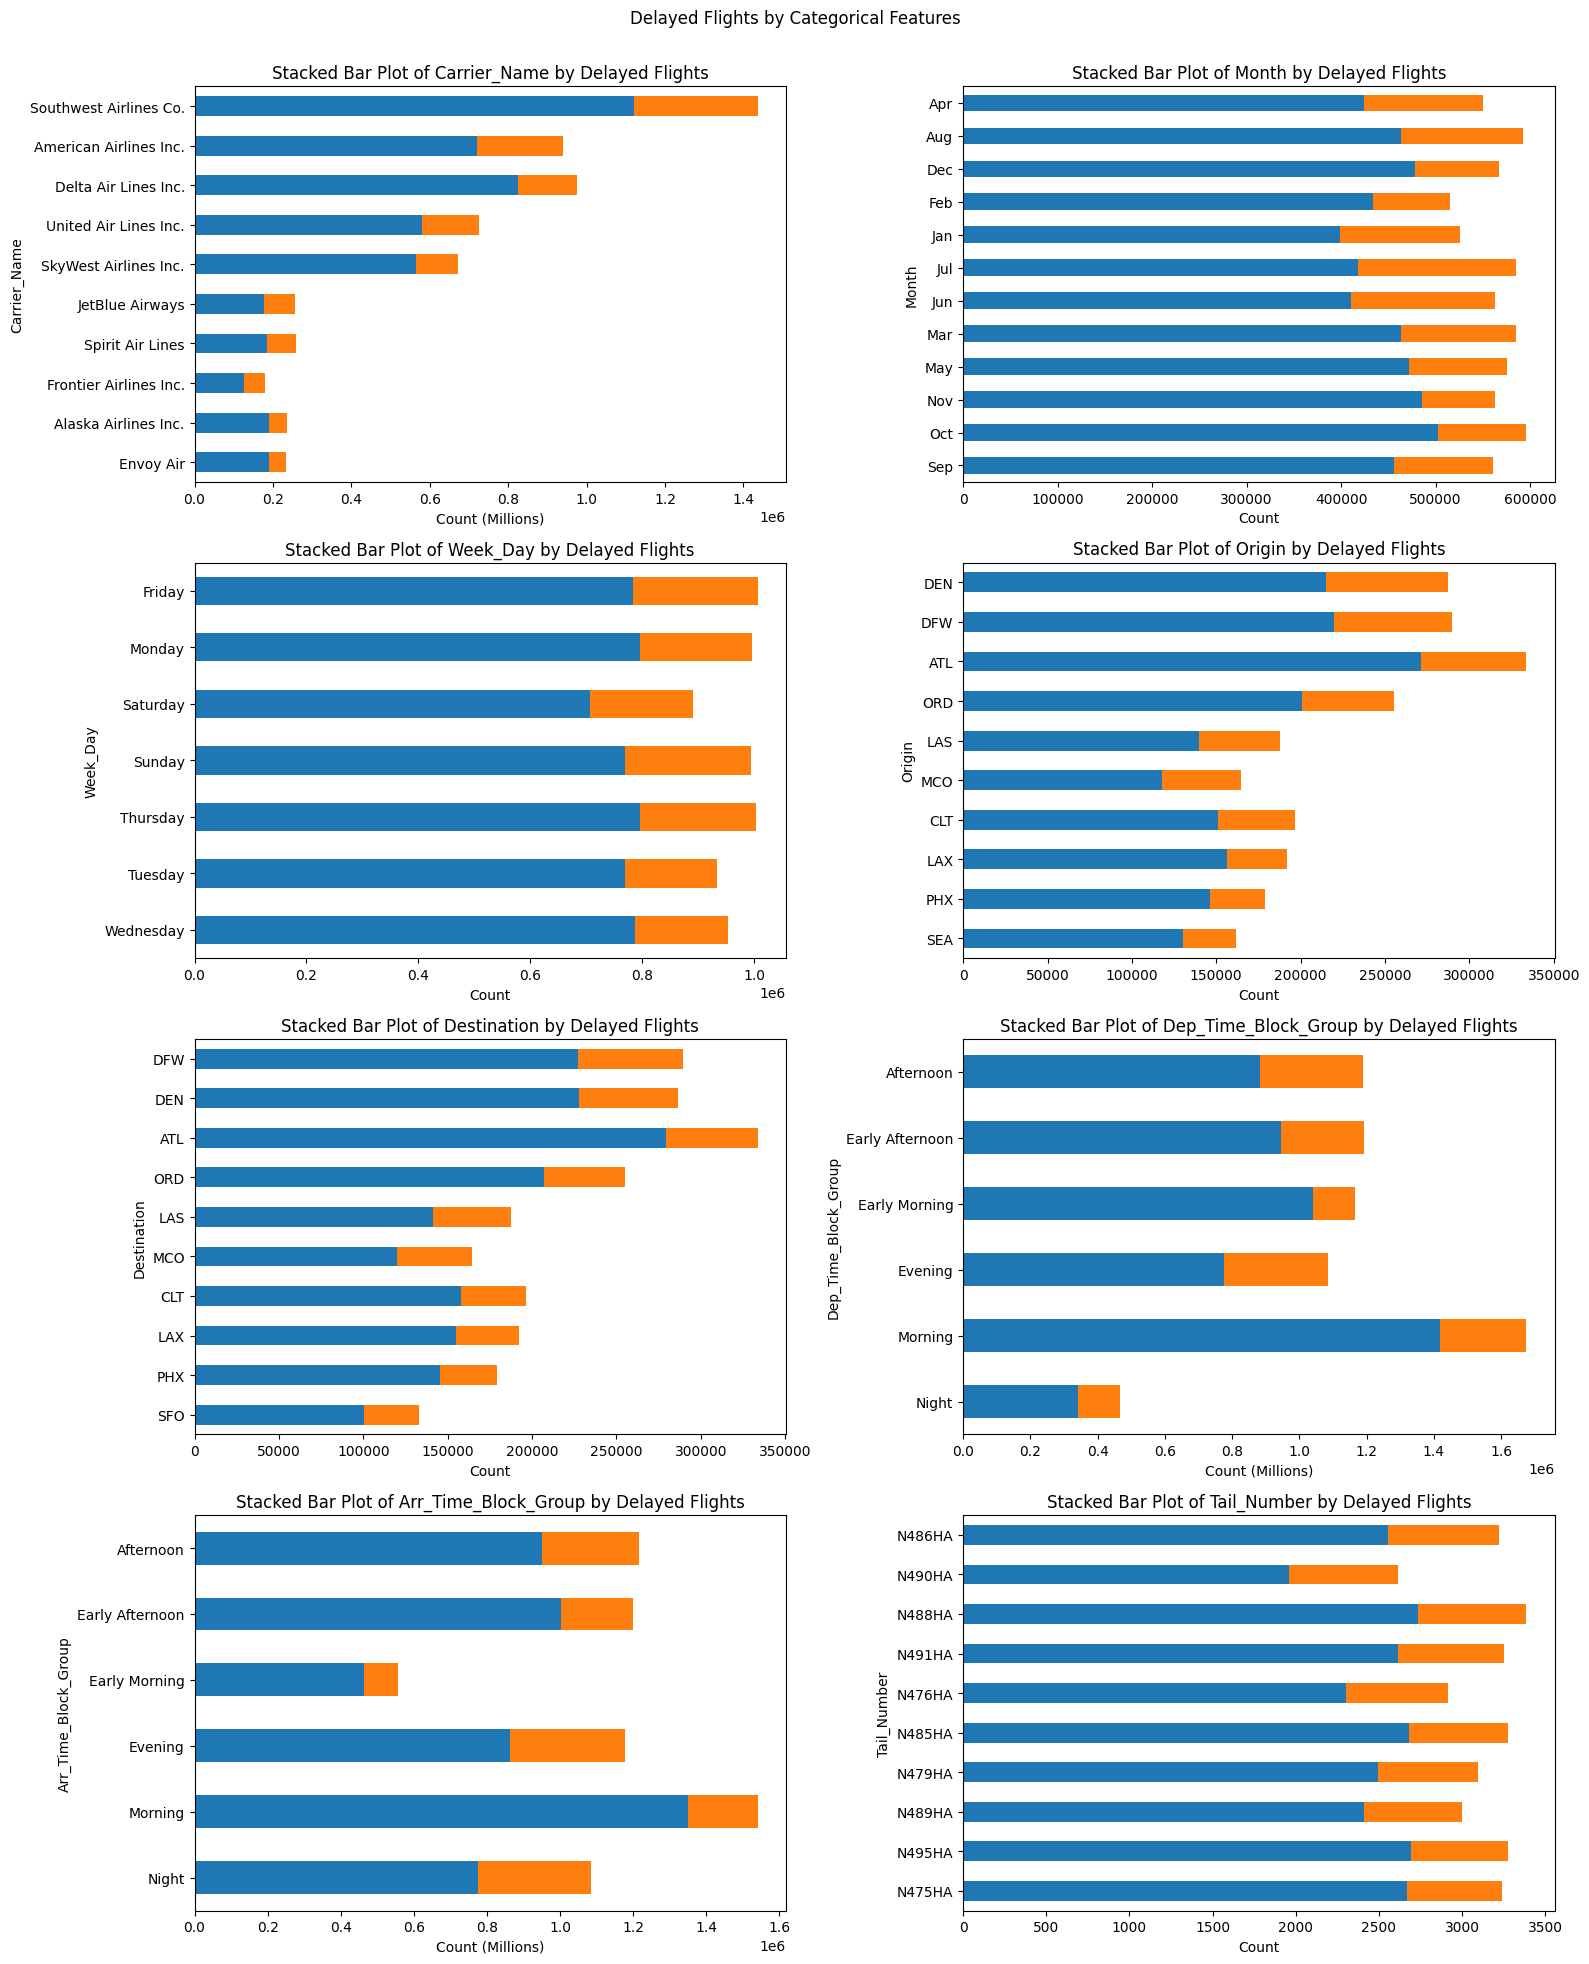

In [15]:
# Function to get top 10 values with delays
def get_top_10_with_delays(df, feature, target):
    top_10 = df[df[target] == 1][feature].value_counts().head(10).index
    return df[df[feature].isin(top_10)]

# Create a 4x2 subplot figure
fig, axs = plt.subplots(4, 2, figsize=(16, 20))
axs = axs.flatten()

# Plotting each categorical feature
for i, feature in enumerate(categorical_features):
    if feature in ['Carrier_Name', 'Origin', 'Destination', 'Tail_Number']:
        filtered_df = get_top_10_with_delays(df, feature, target)
        # Calculate counts of delayed flights by feature
        contingency_table = pd.crosstab(filtered_df[feature], filtered_df[target])
        # Sort values by the count of delayed flights in descending order
        contingency_table = contingency_table.sort_values(by=1, ascending=False)
    else:
        # For other features, use the entire dataframe
        contingency_table = pd.crosstab(df[feature], df[target])

    # Plotting each subplot
    contingency_table.plot(kind='barh', stacked=True, ax=axs[i], legend=False)
    axs[i].set_title(f'Stacked Bar Plot of {feature} by Delayed Flights')
    axs[i].set_xlabel('Count')

    # Check maximum x-axis value to decide xlabel
    if contingency_table.max().max() >= 1000000:
        axs[i].set_xlabel('Count (Millions)')
    else:
        axs[i].set_xlabel('Count')

    axs[i].invert_yaxis()  # Invert y-axis to have largest at the top

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Delayed Flights by Categorical Features')
plt.show()

## Correlation Analysis of Features to Target

                         Chi2  p-value  Cramér's V
Carrier_Name          88204.1      0.0         0.1
Month                 88346.7      0.0         0.1
Week_Day              14705.8      0.0         0.0
Origin                62847.1      0.0         0.1
Destination           43514.6      0.0         0.1
Dep_Time_Block_Group 174372.7      0.0         0.2
Arr_Time_Block_Group 155062.3      0.0         0.2


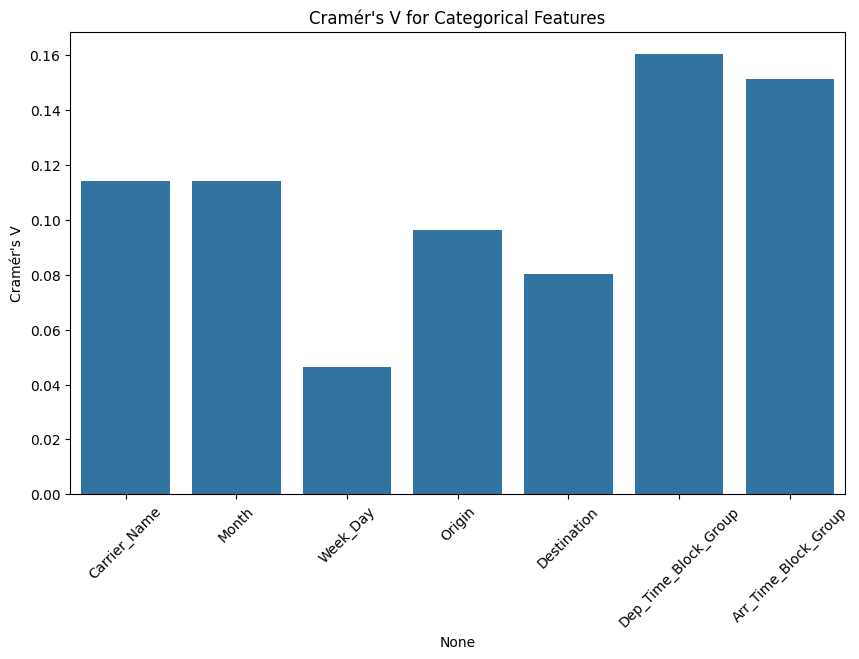

In [16]:
# List of categorical features
categorical_features = [
                      'Carrier_Name',
                      'Month',
                      'Week_Day',
                      'Origin',
                      'Destination',
                      'Dep_Time_Block_Group',
                      'Arr_Time_Block_Group'
                      ]

# Target variable
target = 'Delayed'

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Dictionary to store results
results = {}

# Chi-square test and Cramér's V calculation
for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df[target])

    # Perform Chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    # Calculate Cramér's V
    cramers_v_value = cramers_v(contingency_table.values)

    # Store results
    results[feature] = {'Chi2': chi2, 'p-value': p, 'Cramér\'s V': cramers_v_value}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display results
print(results_df)

# Plot the Cramér's V values
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='Cramér\'s V', data=results_df)
plt.xticks(rotation=45)
plt.title('Cramér\'s V for Categorical Features')
plt.show()